In [12]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [13]:
# Step 1: Load Dataset from URL
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/IRIS.csv"
df = pd.read_csv(url)
print("Dataset Loaded Successfully!\n")

Dataset Loaded Successfully!



In [23]:
# Step 2: Basic Exploration
print("First 5 Rows: \n", df.head())
print("\nDataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

First 5 Rows: 
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Dataset Shape: (150, 5)

Missing Values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


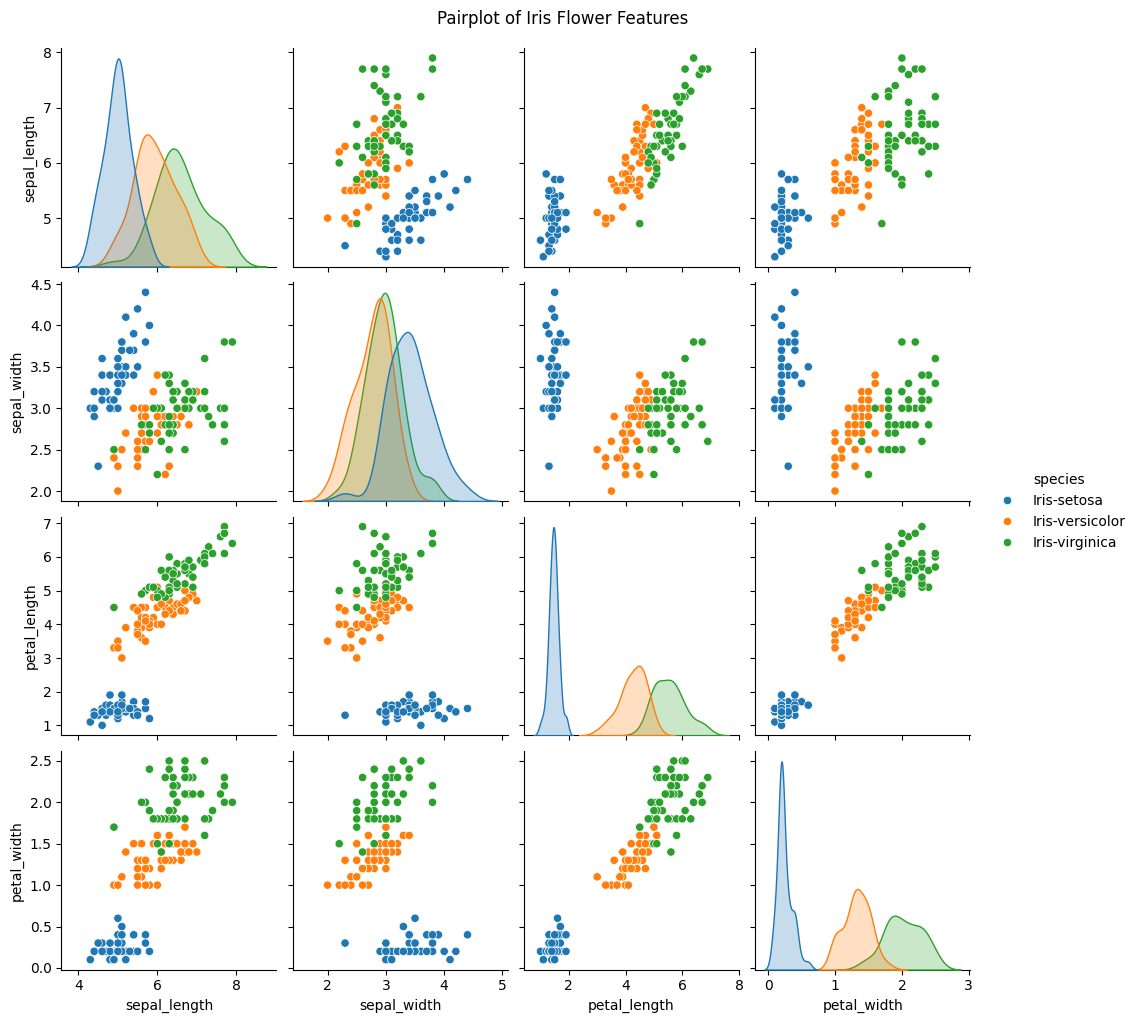

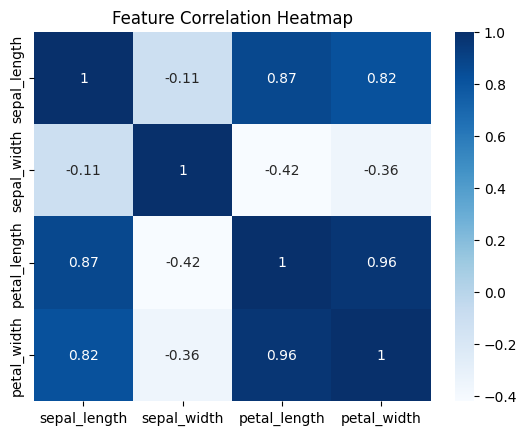

In [15]:
# Step 3: Exploratory Data Analysis (EDA)
sns.pairplot(df, hue="species")
plt.suptitle("Pairplot of Iris Flower Features", y=1.02)
plt.show()

sns.heatmap(df.drop("species", axis=1).corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation Heatmap")
plt.show()

In [16]:
# Step 4: Prepare Features (X) and Target (y)
X = df.drop("species", axis=1)  # Measurements: sepal length, sepal width, etc.
y = df["species"]               # Target: Flower species

In [17]:
# Step 5: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [18]:
# Step 6: Train a Machine Learning Model (Logistic Regression)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
print("\n Model Trained Successfully!")


 Model Trained Successfully!


In [19]:
# Step 7: Make Predictions and Evaluate the Model
y_pred = model.predict(X_test)

print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))


 Accuracy: 1.0

 Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



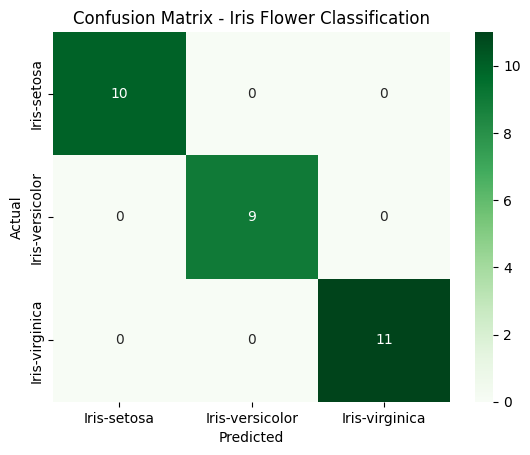

In [20]:
# Step 8: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d",
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Confusion Matrix - Iris Flower Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [21]:
# Step 9: Save the Trained Model
joblib.dump(model, "iris_model.pkl")
print("\n Model saved as iris_model.pkl")


 Model saved as iris_model.pkl
